# AI Project - Amogh & Japneet

# Customer Churn Prediction in Banking

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold


from sklearn.metrics import roc_curve 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC

In [24]:
df = pd.read_csv("C:/Users/DELL/Downloads/Churn_Modelling.csv")

In [25]:
df.head()

# Here, the EXITED column refers to whether a customer has churned or not. 1 = Y, 0 = N.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


CHECKING THE COUNT FOR MISSING VALUES


In [27]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [28]:
# Geting the unique count for each variable

df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

No Missing Values: Complete dataset, no imputation needed.
Simple Categorical Encoding: "Geography" and "Gender" easily converted to numerical values.
Numerical Features Ready: "Age," "Tenure," etc., are model-ready.
Efficient Use of Resources: Focus on modeling with existing predictive features.

Conclusion: Initial data assessment showed feature engineering was not essential for this stage, streamlining the path to modeling.


In [29]:
# Removing the features which have no impact on the churn of customers/models

drop_list = [
'RowNumber',
'CustomerId',
'Surname'
]

df=df.drop(drop_list,axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Exploratory Data Analysis (EDA)

In [31]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

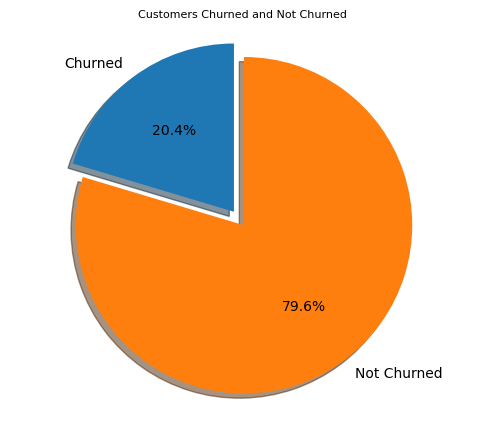

In [32]:
labels = 'Churned', 'Not Churned'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Customers Churned and Not Churned", size = 8)
plt.show()

The dataset appears to be imbalanced, with a disproportionate representation of churn versus non-churn customers. This imbalance should be taken into account during the model development process.

NUMERICAL FEATURES

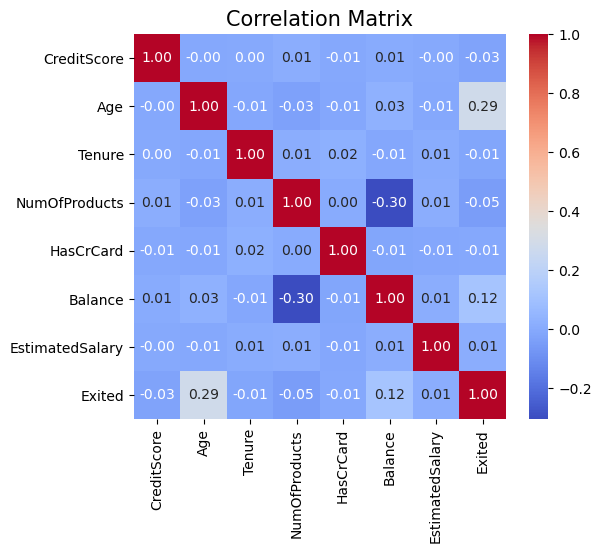

In [33]:
# Correlation Matrix for Numerical Features

f, ax = plt.subplots(figsize=[6, 5])
g = sns.heatmap(df[["CreditScore", "Age", "Tenure", "NumOfProducts", "HasCrCard", "Balance", "EstimatedSalary", "Exited"]].corr(), annot=True, fmt=".2f", ax=ax, cmap="coolwarm")
ax.set_title("Correlation Matrix", fontsize=15)
plt.show()

The heatmap indicates weak to moderate correlations without signs of multicollinearity, suggesting the data variables are relatively independent and may be suitable for predictive modeling without the need for multicollinearity remediation.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

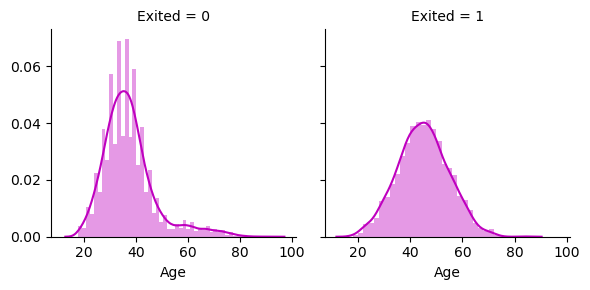

In [34]:
g = sns.FacetGrid(df, col='Exited')
g = g.map(sns.distplot, "Age", color="m")

From the graph, it appears that there are two distinct distributions of age for the customers who have exited (Exited = 1) and those who have not (Exited = 0):

Customers who have not exited (Exited = 0) seem to have a broader age distribution with a peak around the 30-40 age range.
Customers who have exited (Exited = 1) tend to have a narrower age distribution with a peak slightly higher than the non-exited group, around the 40-50 age range.
This suggests that age may be a factor in customer churn, with middle-aged customers more likely to exit. The distribution also indicates that younger and older customers are less likely to churn, which could be valuable information for developing targeted customer retention strategies.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

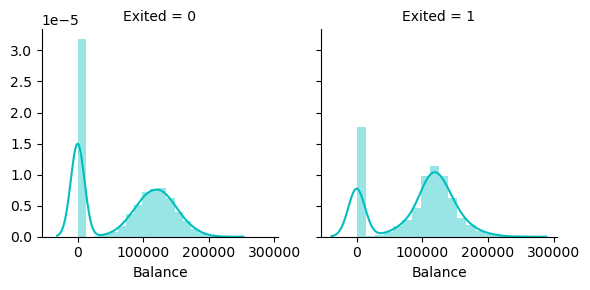

In [35]:
g = sns.FacetGrid(df, col='Exited')
g = g.map(sns.distplot, "Balance", color="c")

Observations from the graph:

For customers who have not exited (Exited = 0), there is a significant spike at the zero balance mark, indicating a large number of customers with no balance or a very low balance. Beyond this, the distribution appears to be multimodal, with peaks at various balance levels.

In contrast, the distribution for customers who have exited (Exited = 1) lacks the pronounced spike at zero balance, suggesting that customers who churn tend to have a higher balance. This group also shows a multimodal distribution but with less pronounced peaks compared to those who haven't exited.

These patterns could suggest that customers with no balance are less likely to churn, while those with certain levels of balance are more prone to exiting. Financial balance may be an important feature to consider when predicting customer churn or when designing customer retention or engagement strategies.

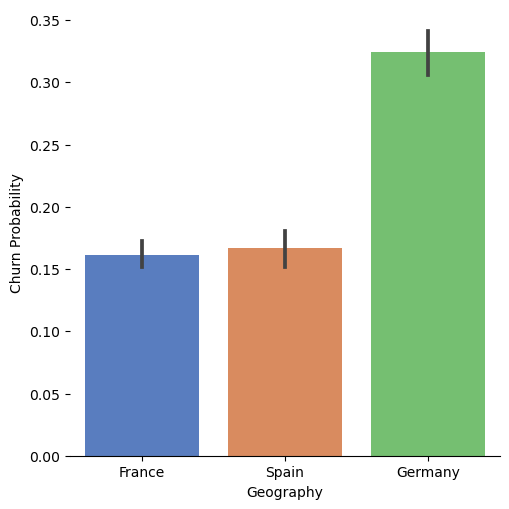

In [36]:
g = sns.catplot(x="Geography",y="Exited", data=df, kind="bar", height = 5 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Churn Probability")

From the provided bar chart, it is evident that:

Customers from Germany have a higher probability of churning compared to those from France and Spain, as indicated by the tallest bar.
The churn probability for customers from France and Spain is relatively lower and quite similar to each other, as shown by the almost equal height of their respective bars.

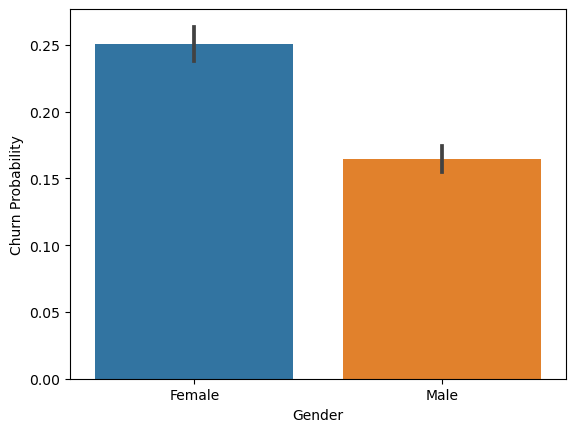

In [37]:
g = sns.barplot(x="Gender",y="Exited",data=df)
g = g.set_ylabel("Churn Probability")

Based on the chart:

Female customers have a higher probability of churning compared to male customers, as indicated by the taller blue bar for 'Female'.
The churn probability for male customers is lower, as depicted by the shorter orange bar for 'Male'.

# DETECTING OUTLIERS

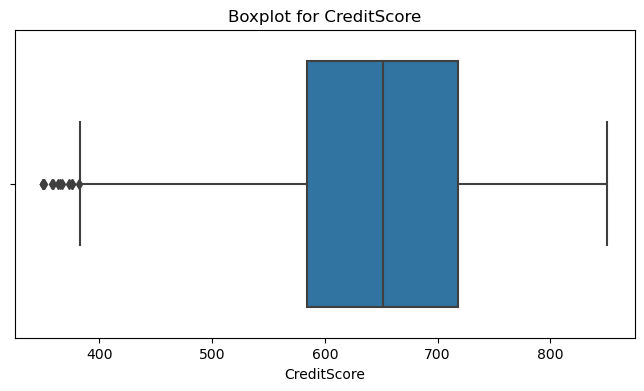

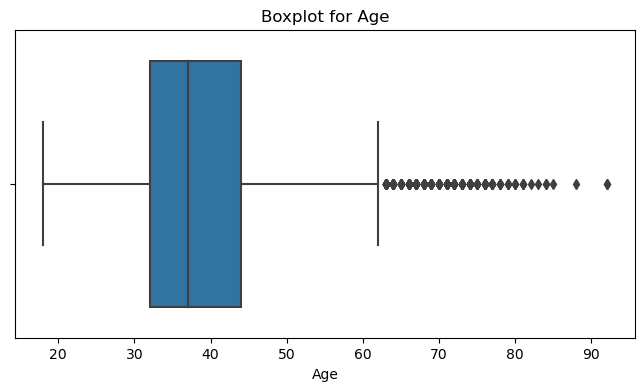

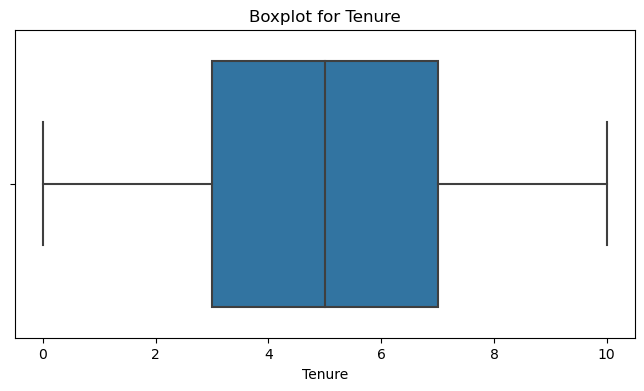

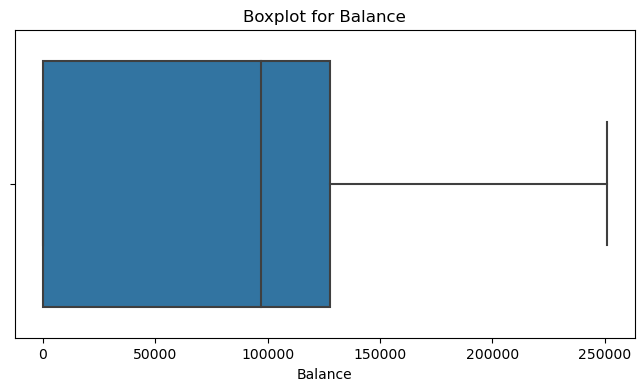

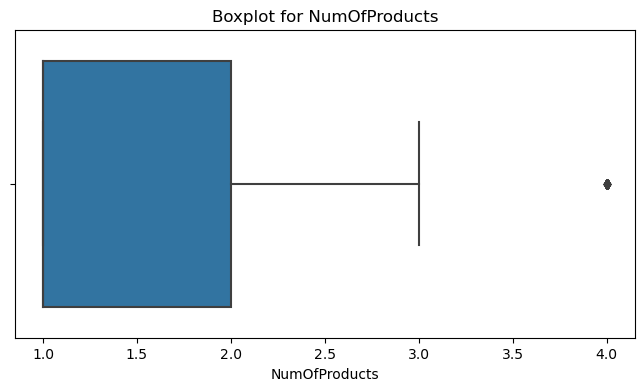

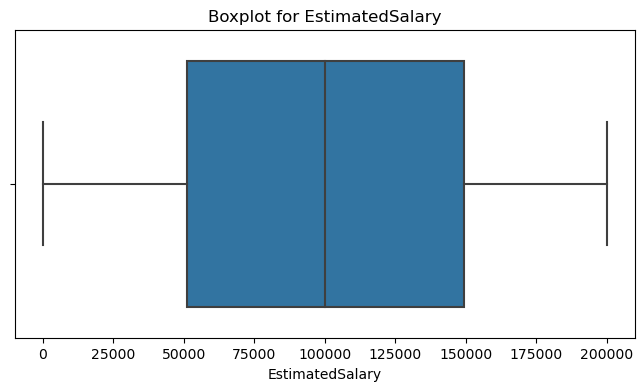

Indices of outliers for more than 2 features: []


In [64]:

def detect_outliers(df, n, features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 'n' outliers
    outlier_indices_counter = Counter(outlier_indices)        
    multiple_outliers = [k for k, v in outlier_indices_counter.items() if v > n]
    
    return multiple_outliers

def plot_outliers(df, features):
    for feature in features:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[feature])
        plt.title(f'Boxplot for {feature}')
        plt.show()

# detect outliers from specified features
Outliers_to_drop = detect_outliers(df, 2, ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"])

# plot outliers for specified features
plot_outliers(df, ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"])

print(f'Indices of outliers for more than 2 features: {Outliers_to_drop}')


In [66]:
# Print the resultS

print("Indices of outliers to drop:", Outliers_to_drop)
print("Rows with outliers:")
print(df.loc[Outliers_to_drop])

Indices of outliers to drop: []
Rows with outliers:
Empty DataFrame
Columns: [CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Geography_France, Geography_Germany, Geography_Spain, Gender_Female, Gender_Male]
Index: []


The empty result from the outlier detection function suggests that there are no significant outliers across the multiple features checked in the dataset, indicating either a uniformly distributed data or potentially strict criteria for defining outliers.

However, Strict criteria for defining outliers can potentially miss identifying subtle but influential anomalies in the data, which could contain important information or indicate underlying issues that need to be addressed. Overly strict thresholds might result in a model that is too generalized and fails to capture the nuances of the data, leading to poorer predictive performance.

# Preprocessing

In [67]:
# To convert categorical variables into a binary matrix format

df = pd.get_dummies(df)
df.head() 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


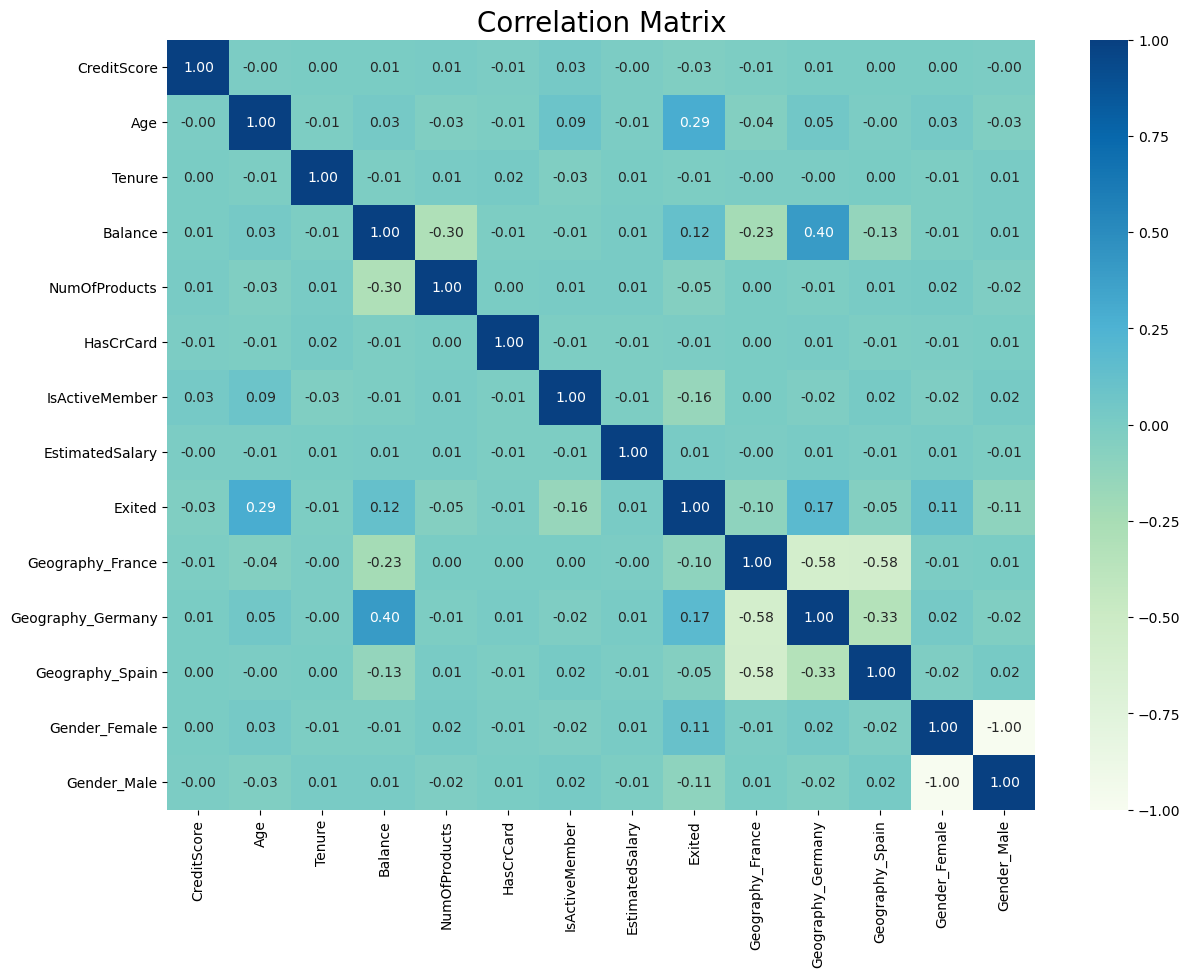

In [68]:
# Correlation Matrix for Wide Format Data

f, ax = plt.subplots(figsize=[14, 10])
g = sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="GnBu")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [69]:
y = df["Exited"] # Creating a variable y that represents the target variable

X = df.drop(labels = ["Exited"],axis = 1) # Creating a variable X that represents the features used for prediction

Target Variable (y): This is the variable we want to predict or explain. In supervised learning, it's the outcome or label that the model is being trained to predict.

Features (X): These are the input variables that the model will use to make its predictions. They are the attributes or dimensions of the data that provide information about each instance's characteristics.
    
    Separating X and y allows for a clear distinction between the data used to train the model and the outcomes we're trying to predict, which is essential for training, testing, and validating the performance of the model.

# THE MODEL

In [70]:
# Splitting data into testing and training data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1992)

PREVENTING OVERFITTING USING SMOTE

In [71]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object with specified parameters

smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy=1)
X_train_smo, y_train_smo = smote.fit_resample(X_train, y_train)


In [72]:
y_train.value_counts()

0    5573
1    1427
Name: Exited, dtype: int64

In [73]:
y_train_smo.value_counts()

1    5573
0    5573
Name: Exited, dtype: int64

CROSS VALIDATION

In [74]:
# Cross validate model with Kfold stratified cross validation

kfold = StratifiedKFold(n_splits=5)

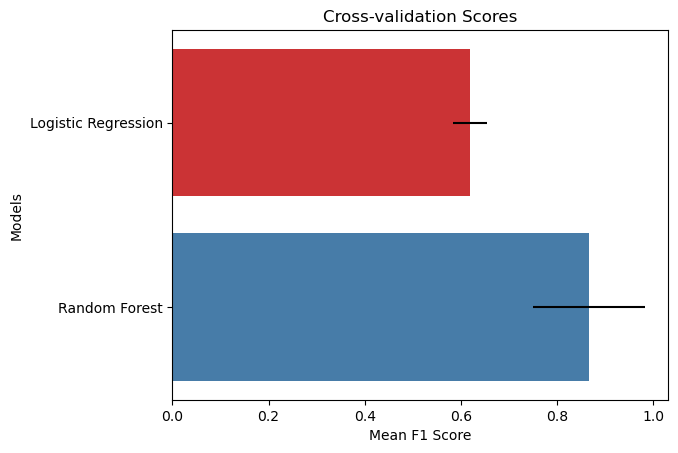

In [55]:
# Define classifiers

classifiers = [
    LogisticRegression(),
    RandomForestClassifier()
]

# Perform cross-validation

cv_results = []
cv_means = []
cv_std = []

for classifier in classifiers:
    cv_result = cross_val_score(classifier, X_train_smo, y=y_train_smo, scoring="f1", cv=kfold, n_jobs=4)
    cv_results.append(cv_result)
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

# Creating a DataFrame to store cross-validation results

cv_res = pd.DataFrame({"CrossValMeans": cv_means, "CrossValerrors": cv_std, "Models": ["Logistic Regression", "Random Forest"]})

# Create a horizontal bar plot to visualize cross-validation results

g = sns.barplot(x="CrossValMeans", y="Models", data=cv_res, palette="Set1", orient="h", xerr=cv_std)
g.set_xlabel("Mean F1 Score")
g.set_title("Cross-validation Scores")
plt.show()

# HYPERPARAMETER TUNING

In [75]:
# LogisticRegression

LR = LogisticRegression()

param_grid = {
                  "C":np.logspace(-3,3,7), 
                  "penalty":["l1","l2"]
}

gs_LR = GridSearchCV(LR, param_grid = param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gs_LR.fit(X_train_smo,y_train_smo)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueErro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [76]:
y_pred = gs_LR.predict(X_test)

In [77]:
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))

# The model has good precision for class 0 but lower precision for class 1


Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.64      0.75      2390
           1       0.33      0.69      0.45       610

    accuracy                           0.65      3000
   macro avg       0.61      0.67      0.60      3000
weighted avg       0.78      0.65      0.69      3000


Confusion Matrix:
[[1538  852]
 [ 187  423]]


In [78]:
# RandomForest 

RFC = RandomForestClassifier()


param_grid = {
              "max_depth": [4,5,7],
              "max_features": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[80,100,120],
              "criterion": ["gini"]
}
gs_RFC = GridSearchCV(RFC,param_grid = param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gs_RFC.fit(X_train_smo,y_train_smo)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [4, 5, 7], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'n_estimators': [80, 100, 120]},
             scoring='f1', verbose=1)

In [79]:
y_pred = gs_RFC.predict(X_test)

In [61]:
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))

# the model has good precision for class 0 and moderate precision for class 1. 
# It has high recall for class 0 but lower recall for class 1. 


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2390
           1       0.57      0.60      0.59       610

    accuracy                           0.83      3000
   macro avg       0.74      0.74      0.74      3000
weighted avg       0.83      0.83      0.83      3000


Confusion Matrix:
[[2117  273]
 [ 242  368]]


In [80]:
# Evaluate accuracy for each model

y_pred_lr = gs_LR.predict(X_test)
y_pred_rf = gs_RFC.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(accuracy_lr)
print(accuracy_rf)

0.6536666666666666
0.8266666666666667


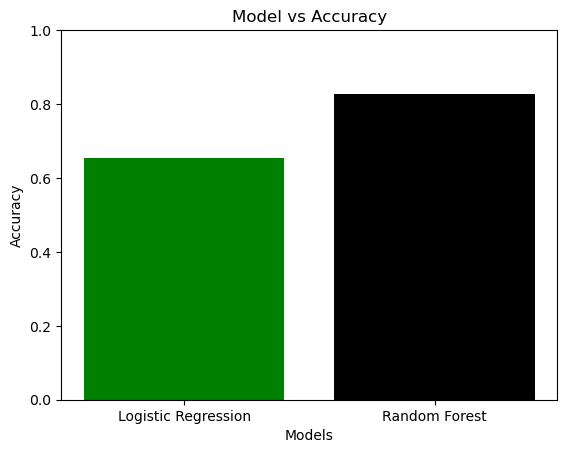

In [63]:
# Create a bar plot for better visualisation

models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_lr, accuracy_rf]

plt.bar(models, accuracies, color=['green', 'black'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model vs Accuracy')
plt.ylim(0, 1)
plt.show()

Conclusion:The critical aspects of using churn prediction models to drive financial decisions and formulate concrete business actions. It emphasizes the importance of model accuracy in reducing costs associated with customer churn and the need to translate predictions into strategic initiatives.